# 외부 라이브러리

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.2 MB/s

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 세션 재시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (20.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

# 기본 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/20240216/누아보해커톤데이터'

/content/drive/MyDrive/20240216/누아보해커톤데이터


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import optuna
from catboost import CatBoostClassifier
from pycaret import classification
import random
import os
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,log_loss
from sklearn.preprocessing import StandardScaler



import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

# 기본 2

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# ID는 사용하지 않을 칼럼이므로 모두 삭제
train = train.drop(['ID'], axis = 1)
test = test.drop('ID', axis = 1)

In [ ]:
# deep copy를 이용해 전처리 전후를 용이하게 비교
train_l = train.copy()
test_l = test.copy()

In [ ]:
# 한국어 사용
plt.rc('font', family='NanumBarunGothic')

# 칼럼별 분석

In [ ]:
train.columns

Index(['월', '요일', '시간', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림',
       '범죄발생지', 'TARGET'],
      dtype='object')

## 1. 월

**가설 1: 온도가 높을수록 절도의 비율이 감소할 것이다.**
- 근거:
- 변환 방법: 온도가 높은 7,8월과 나머지 열을 구분하여 인코딩
- 성능: 하락
- 예상 이유: 데이터에는 그러한 흐름이 나타나지 않았지만 실제 통계 기반 가설을 세웠기 때문

**가설 2: target이 1일때와 2일때의 차이를 정렬해 인코딩하면 성능이 향상될 것이다.**
- 근거: target이 0인 경우는 월에 상관없이 항상 압도적으로 많은 비율을 가진다. 이에 유사한 비율을 가진 1과 2일 때를 비교하여 정렬하는 것이 해석에 장점을 가질 것이다.
- 변환 방법: 월별로 target이 1일때와 2일때의 차이를 구해 정렬 후 인코딩
- 성능: 상승

TARGET         0         1         2
월                                   
1       0.445226  0.288250  0.266524
2       0.442411  0.285054  0.272535
3       0.424324  0.285074  0.290602
4       0.421313  0.293016  0.285671
5       0.426478  0.287519  0.286003
6       0.440092  0.287390  0.272518
7       0.423764  0.299100  0.277135
8       0.429949  0.310677  0.259374
9       0.437449  0.307835  0.254716
10      0.435935  0.323893  0.240172
11      0.421244  0.327259  0.251497
12      0.468504  0.309055  0.222441


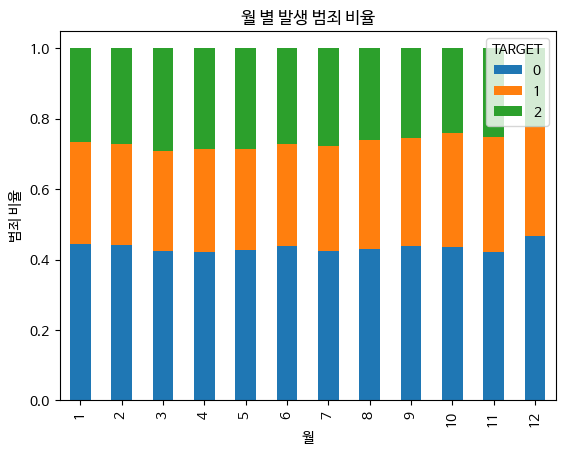

In [ ]:
# 월별 발생 범죄 비율 EDA
target_counts_by_month = train.groupby('월')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
print(target_counts_by_month)
target_counts_by_month.plot(kind='bar', stacked=True)
plt.title('월 별 발생 범죄 비율')
plt.xlabel('월')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

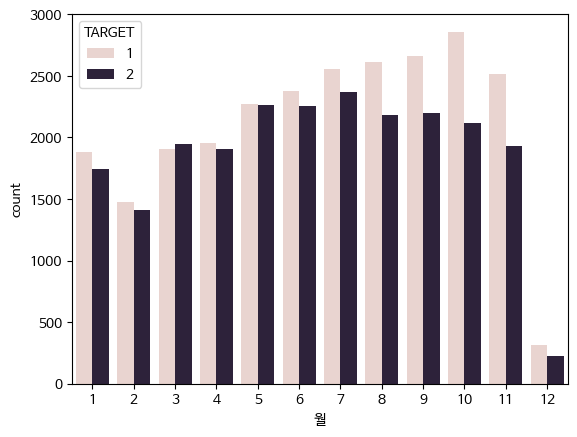

In [ ]:
# 월별 target이 1일때와 2일때를 비교 (target이 0인 경우는 항상 비슷한 비율로 많다)
train_without_0 = train[train['TARGET']!=0]
sns.countplot(x = '월', hue = 'TARGET', data = train_without_0)
plt.show()

In [ ]:
target_counts_by_month['target_diff'] = target_counts_by_month[1] - target_counts_by_month[2]
target_counts_by_month['target_diff'].sort_values(ascending = True)

월
3    -0.005528
5     0.001516
4     0.007344
2     0.012519
6     0.014871
1     0.021726
7     0.021965
8     0.051303
9     0.053119
11    0.075762
10    0.083720
12    0.086614
Name: target_diff, dtype: float64

In [ ]:
mapping_months = {
    3: 1,    5: 2,    4: 3,    2: 4,
    6: 5,    1: 6,    7: 7,    8: 8,
    9: 9,    11: 10,    10: 11,    12: 12
}

def map_months(data):
    return data['월'].map(mapping_months).fillna(1).astype(int)

train_l['월'] = map_months(train)
test_l['월'] = map_months(test)

## 2. 범죄발생지

**가설 1: 범죄발생지가 실내인 경우와 실외인 경우를 구분해 인코딩하면 성능이 향상될 것이다.**
- 근거:
- 변환 방법:
- 성능: 하락
- 예상 이유:

**가설 2: 물품을 판매하는 곳과 그렇지 않은 곳을 구분해 인코딩하면 성능이 향상될 것이다.**
- 근거:
- 변환 방법:
- 성능: 하락
- 예상 이유:

In [ ]:
train['범죄발생지'].unique()

array(['차도', '인도', '주거지', '주유소', '주차장', '편의점', '학교', '식당', '백화점', '약국',
       '호텔/모텔', '은행', '병원', '공원'], dtype=object)

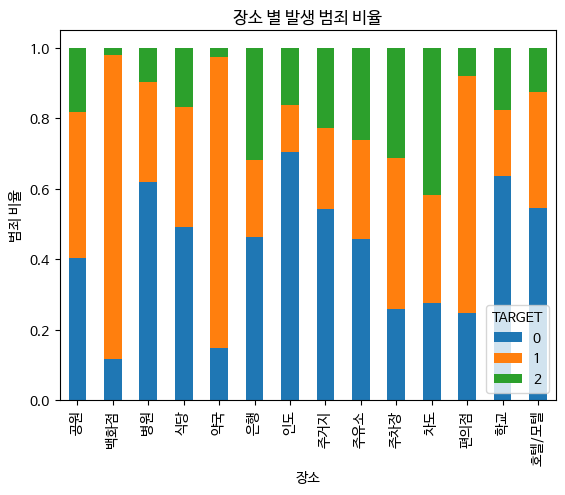

In [ ]:
plt.rc('font', family='NanumBarunGothic')
target_counts_by_place = train.groupby('범죄발생지')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_place.plot(kind='bar', stacked=True)
plt.title('장소 별 발생 범죄 비율')
plt.xlabel('장소')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

In [ ]:
#1 실내와 실외 구분
mapping_place = {
    '차도': 0,    '인도': 0,   '주유소': 0,   '주차장': 0,   '공원': 0,
    '편의점': 1,    '학교': 1,    '식당': 1, '주거지': 1,    '은행': 1,
    '백화점': 1,    '약국': 1,    '호텔/모텔': 1,   '병원': 1

}

In [ ]:
#2 물건을 판매하는 곳과 아닌 곳을 구분
mapping_place = {
    '차도': 0,    '인도': 0,    '주거지': 0,    '주유소': 0,
    '주차장': 0,    '편의점': 1,    '학교': 0,    '식당': 0,
    '백화점': 1,    '약국': 1,    '호텔/모텔': 0,    '은행': 0,
    '병원': 0,    '공원': 0
}

In [ ]:
'''
def map_place(data):
    return data['범죄발생지'].map(mapping_place).fillna(-1).astype(int)

train_l['범죄발생지'] = map_place(train)
test_l['범죄발생지'] = map_place(test)
'''

"\ndef map_place(data):\n    return data['범죄발생지'].map(mapping_place).fillna(-1).astype(int)\n\ntrain_l['범죄발생지'] = map_place(train)\ntest_l['범죄발생지'] = map_place(test)\n"

## 3. 시간

**가설 1: target = 1의 비율을 오름차순으로 정렬해 인코딩하면 성능이 향상될 것이다.**
- 근거: 시간 별 발생 범죄 비율을 보면 target이 1일때가 증가하고 감소함에 따라 0과 2가 감소하고 증가한다.
- 변환 방법: target = 1의 비율을 오름차순으로 정렬해 인코딩
- 성능: 상승


TARGET         0         1         2
시간                                  
1       0.447483  0.284083  0.268434
2       0.449853  0.291912  0.258235
3       0.435713  0.301452  0.262835
4       0.442855  0.306152  0.250993
5       0.427666  0.322334  0.250000
6       0.420820  0.331100  0.248080
7       0.418165  0.320366  0.261469
8       0.429453  0.303226  0.267321
9       0.422430  0.292785  0.284784
10      0.430009  0.282781  0.287210
11      0.454803  0.262158  0.283039
12      0.409110  0.318538  0.272352


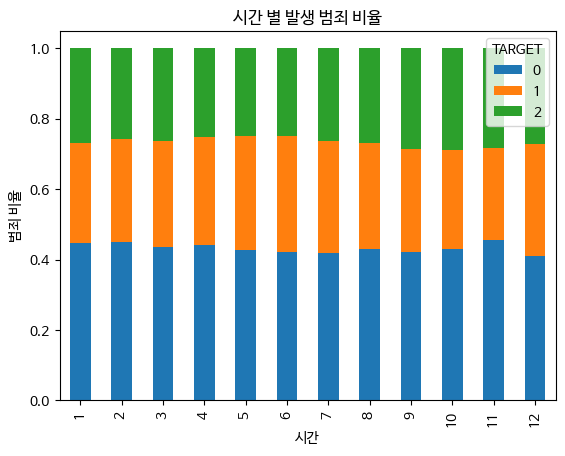

In [ ]:
target_counts_by_time = train.groupby('시간')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
print(target_counts_by_time)
target_counts_by_time.plot(kind='bar', stacked=True)
plt.title('시간 별 발생 범죄 비율')
plt.xlabel('시간')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

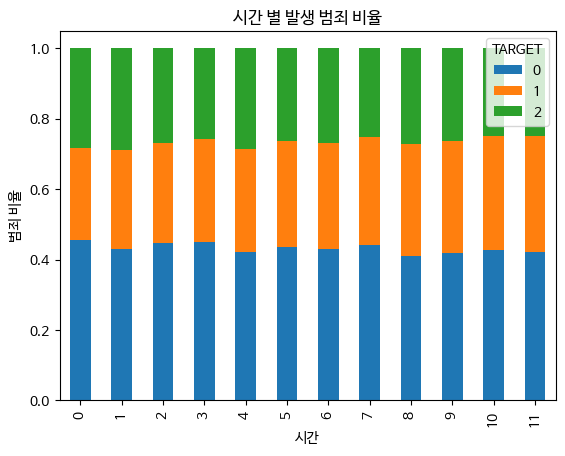

In [ ]:
target_ratio_1_time = target_counts_by_time[1].sort_values(ascending=True)

label_mapping = {dist: idx for idx, dist in enumerate(target_ratio_1_time.index)}

train_l['시간'] = train_l['시간'].map(label_mapping)
test_l['시간'] = test_l['시간'].map(label_mapping)
target_counts_by_time = train_l.groupby('시간')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_time.plot(kind='bar', stacked=True)
plt.title('시간 별 발생 범죄 비율')
plt.xlabel('시간')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

## 4. 요일

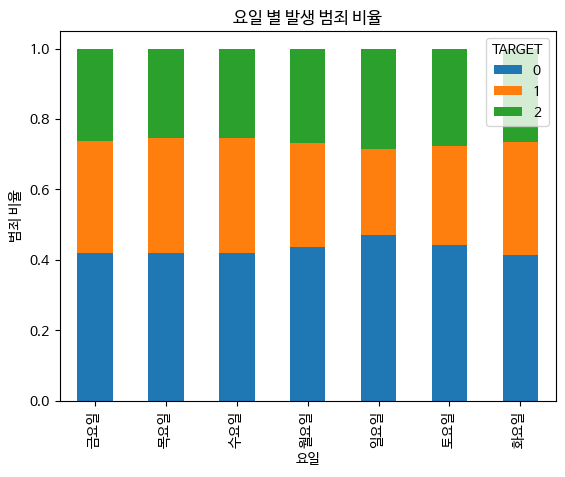

In [ ]:
# 요일별 발생 범죄 비율
target_counts_by_day = train.groupby('요일')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_day.plot(kind='bar', stacked=True)
plt.title('요일 별 발생 범죄 비율')
plt.xlabel('요일')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

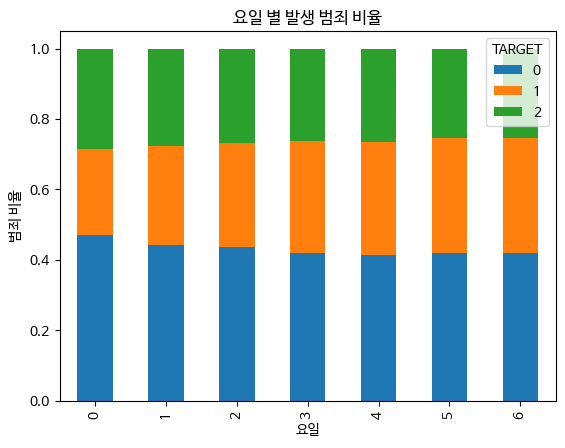

In [ ]:
target_ratio_1_day = target_counts_by_day[1].sort_values(ascending=True)

label_mapping = {dist: idx for idx, dist in enumerate(target_ratio_1_day.index)}

train_l['요일'] = train_l['요일'].map(label_mapping)
test_l['요일'] = test_l['요일'].map(label_mapping)
target_counts_by_day = train_l.groupby('요일')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_day.plot(kind='bar', stacked=True)
plt.title('요일 별 발생 범죄 비율')
plt.xlabel('요일')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

## 5. 소관 경찰서

*** 소관경찰서와 소관지역은 매우 유사한 분포를 보인다. 이에 다중공선성 문제를 해결하기 위한 다양한 해결 방안을 적용해본다.**

**가설 1: 소관 경찰서만 사용(소관지역 Drop)**

**가설 2: 소관 지역만 사용(소관경찰서 Drop)**

**가설 3: PCA를 사용**


TARGET         0         1         2
소관경찰서                               
26      0.240557  0.691849  0.067594
27      0.262136  0.647249  0.090615
28      0.483871  0.435484  0.080645
29      0.249322  0.612466  0.138211
36      0.394958  0.445378  0.159664
...          ...       ...       ...
2446    0.457627  0.250000  0.292373
2447    0.474474  0.210210  0.315315
2448    0.349138  0.353448  0.297414
2449    0.472149  0.228117  0.299735
2450    0.400685  0.318493  0.280822

[269 rows x 3 columns]


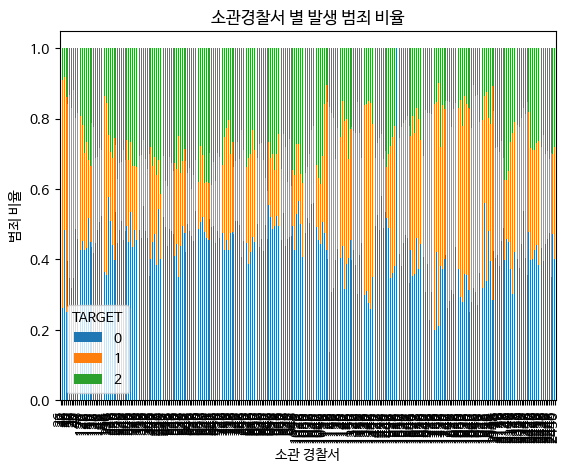

In [ ]:
# 소관 경찰서별 발생 범죄 비율
target_counts_by_po = train.groupby('소관경찰서')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
print(target_counts_by_po)
target_counts_by_po.plot(kind='bar', stacked=True)
plt.title('소관경찰서 별 발생 범죄 비율')
plt.xlabel('소관 경찰서')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

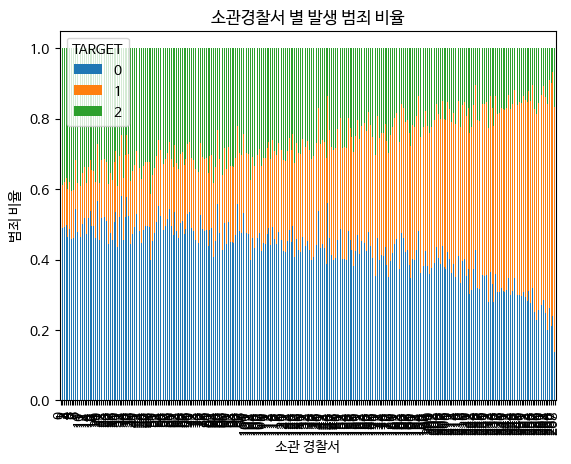

In [ ]:
target_ratio_1_po = target_counts_by_po[1].sort_values(ascending=True)

label_mapping = {dist: idx for idx, dist in enumerate(target_ratio_1_po.index)}

train_l['소관경찰서'] = train_l['소관경찰서'].map(label_mapping)
test_l['소관경찰서'] = test_l['소관경찰서'].map(label_mapping)
target_counts_by_po = train_l.groupby('소관경찰서')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_po.plot(kind='bar', stacked=True)
plt.title('소관경찰서 별 발생 범죄 비율')
plt.xlabel('소관 경찰서')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

## 6. 소관지역

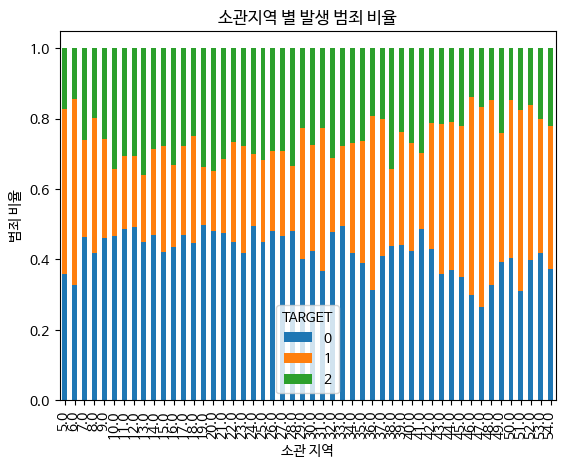

In [ ]:
target_counts_by_lo = train.groupby('소관지역')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_lo.plot(kind='bar', stacked=True)
plt.title('소관지역 별 발생 범죄 비율')
plt.xlabel('소관 지역')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

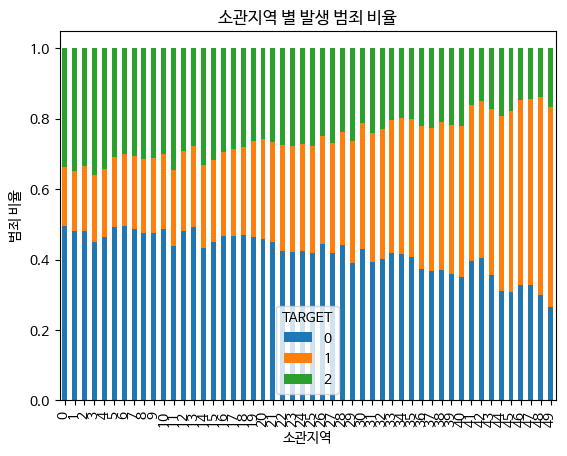

In [ ]:
target_ratio_1_lo = target_counts_by_lo[1].sort_values(ascending=True)

label_mapping = {dist: idx for idx, dist in enumerate(target_ratio_1_lo.index)}

train_l['소관지역'] = train_l['소관지역'].map(label_mapping)
test_l['소관지역'] = test_l['소관지역'].map(label_mapping)
target_counts_by_lo = train_l.groupby('소관지역')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_lo.plot(kind='bar', stacked=True)
plt.title('소관지역 별 발생 범죄 비율')
plt.xlabel('소관지역')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

In [ ]:
'''
selected_columns = ['소관경찰서', '소관지역']
X_selected = train_l[selected_columns]
pca = PCA(n_components=1)
pca.fit(X_selected)

print("주성분:", pca.components_)
print("분산량:", pca.explained_variance_ratio_)

X_pca = pca.transform(X_selected)
print("PCA 적용 데이터:")
print(X_pca)

train_l['PCA_소관'] = X_pca
X_selected_test = test_l[selected_columns]
X_pca_test = pca.transform(X_selected_test)
test_l['PCA_소관'] = X_pca_test
'''


'\nselected_columns = [\'소관경찰서\', \'소관지역\']\nX_selected = train_l[selected_columns]\npca = PCA(n_components=1)\npca.fit(X_selected)\n\nprint("주성분:", pca.components_)\nprint("분산량:", pca.explained_variance_ratio_)\n\nX_pca = pca.transform(X_selected)\nprint("PCA 적용 데이터:")\nprint(X_pca)\n\ntrain_l[\'PCA_소관\'] = X_pca\nX_selected_test = test_l[selected_columns]\nX_pca_test = pca.transform(X_selected_test)\ntest_l[\'PCA_소관\'] = X_pca_test\n'

## 7. 사건 발생거리


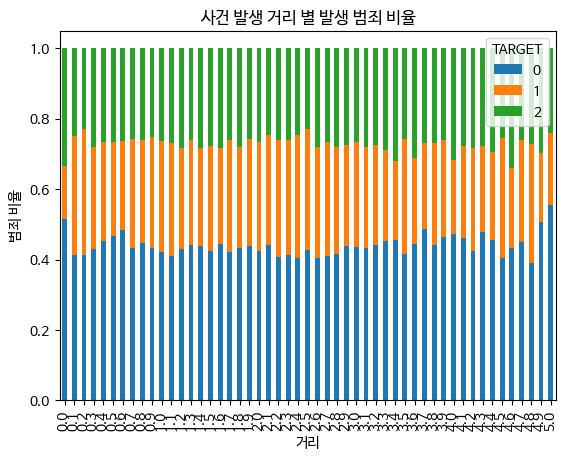

In [ ]:
# 사건발생거리별 발생 범죄 비율
train_l['사건발생거리'] = train['사건발생거리'].round(1)

target_counts_by_dist = train_l.groupby('사건발생거리')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_dist.plot(kind='bar', stacked=True)
plt.title('사건 발생 거리 별 발생 범죄 비율')
plt.xlabel('거리')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

In [ ]:
target_ratio_1 = target_counts_by_dist[1].sort_values(ascending=True)

label_mapping = {dist: idx for idx, dist in enumerate(target_ratio_1.index)}

train_l['사건발생거리'] = train_l['사건발생거리'].map(label_mapping)
test_l['사건발생거리'] = test_l['사건발생거리'].map(label_mapping)

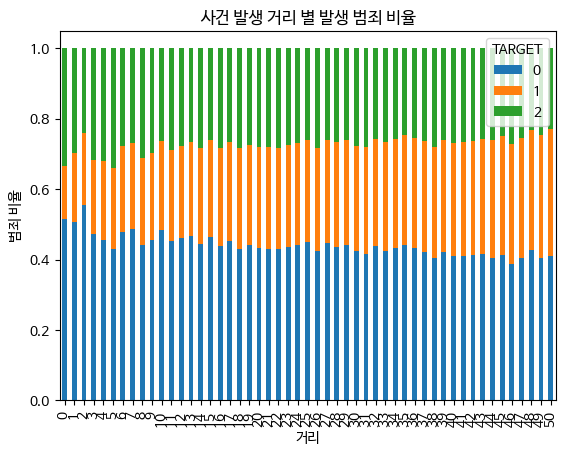

In [ ]:
target_counts_by_dist = train_l.groupby('사건발생거리')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)
target_counts_by_dist.plot(kind='bar', stacked=True)
plt.title('사건 발생 거리 별 발생 범죄 비율')
plt.xlabel('거리')
plt.ylabel('범죄 비율')
plt.legend(title='TARGET')
plt.show()

## 8. 풍향

**가설 1: 풍향을 8 방위로 나누어 표현하면 성능이 향상될 것이다.**
- 근거: 풍향은 0~360까지의 데이터를 가지는데 0과 359는 거의 동일한 데이터를 나타내지만 기계가 이해하기에는 매우 큰 차이로 다가올 것으로 예상하였다. 이에 그 차이를 줄이고자 8 방위로 나누어 표현하였다.
- 변환 방법: 8방위 기준에 따라 각도를 분류한다.
- 성능: 상승

In [ ]:
def convert_to_8_direction(angle):
    if (angle >= 0 and angle < 22.5) or (angle >= 337.5 and angle <= 360.0):
        return 1
    elif angle >= 22.5 and angle < 67.5:
        return 2
    elif angle >= 67.5 and angle < 112.5:
        return 3
    elif angle >= 112.5 and angle < 157.5:
        return 4
    elif angle >= 157.5 and angle < 202.5:
        return 5
    elif angle >= 202.5 and angle < 247.5:
        return 6
    elif angle >= 247.5 and angle < 292.5:
        return 7
    elif angle >= 292.5 and angle < 337.5:
        return 8

In [ ]:

train_l['풍향'] = train['풍향'].apply(convert_to_8_direction)
test_l['풍향'] = test['풍향'].apply(convert_to_8_direction)


## 9. 안개, 짙은안개, 번개, 진눈깨비, 서리, 연기/연무, 눈날림

**가설 1: 기후와 관련된 칼럼의 값을 모두 더해서 사용하면 성능이 향상될 것이다.**
- 근거: 기후가 좋지 않을수록 특정 범죄가 많이 발생할 수 있을 것이다. 가령 EDA를 보면 기후에 1이 있는 경우와 아닌 경우 약간의 차이가 있다(매우 근소하다)
- 변환 방법: 기후가 좋지 않을수록 더 높은 점수를 부여한다. 즉 기후 열의 모든 값을 더한다.(최소:0 ~최대:7)
- 성능: 상승

**가설 2: 기후와 관련된 칼럼을 제거하면 성능이 향상될 것이다.**
- 근거: EDA의 결과가 매우 근소한 차이이기 때문에 특정 범죄 발생과 연관이 없을 수 있다.
- 변환 방법: 열 삭제
- 성능: 상승


**가설 3: 기후와 관련된 이벤트가 하나라도 있을 때 sight 파생 변수를 1로 설정하면 성능이 향상될 것이다.**
- 근거: 기후에 이벤트가 발생한 경우 자체를 중요하다고 판단했다
- 변환 방법: 가설 1에서 0이 아닌 경우를 모두 1로 설정
- 성능: 저하

In [ ]:
climate_col = ['안개', '짙은안개', '번개', '진눈깨비', '연기/연무','서리', '눈날림' ] #

In [ ]:
correlations = train.corr()['TARGET'][climate_col].abs().sort_values(ascending = True)
print(correlations)

연기/연무    0.001377
짙은안개     0.003270
안개       0.005665
번개       0.006760
눈날림      0.007535
서리       0.007828
진눈깨비     0.008656
Name: TARGET, dtype: float64


In [ ]:
'''
train['연기/연무'] = train['연기/연무'] * 0.159
train['짙은안개'] = train['짙은안개'] * 0.377
train['안개'] = train['안개'] * 0.654
train['번개'] = train['번개'] * 0.780
train['눈날림'] = train['눈날림'] * 0.870
train['서리'] = train['서리'] * 0.904
'''

"\ntrain['연기/연무'] = train['연기/연무'] * 0.159\ntrain['짙은안개'] = train['짙은안개'] * 0.377\ntrain['안개'] = train['안개'] * 0.654\ntrain['번개'] = train['번개'] * 0.780\ntrain['눈날림'] = train['눈날림'] * 0.870\ntrain['서리'] = train['서리'] * 0.904\n"

In [ ]:
#  칼럼의 값을 모두 더함
train_l['sight'] = 0
test_l['sight'] = 0
for col in climate_col:
  train_l['sight'] += train[col]
  test_l['sight'] += test[col]

In [ ]:
# 가설 2
# train_l.loc[train_l['sight'] != 0, 'sight'] = 1

# 모델 설정 (automl 이용)

In [ ]:
#classification.setup(data=train,target='TARGET')

NameError: name 'classification' is not defined

In [ ]:
#best_model = classification.compare_models(n_select=5, fold=5)

# 라벨 인코딩

In [ ]:

ordinal_features = ['범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train_l[feature])
    train_l[feature] = le.transform(train_l[feature])

    for label in np.unique(test_l[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)

    test_l[feature] = le.transform(test_l[feature])


# 스케일링

In [ ]:
X = train_l.drop(['TARGET'], axis = 1) #,'소관지역','소관경찰서'
#test_ll = test_l.drop(['소관지역','소관경찰서'], axis = 1)
X_id = X.copy()
#X = X.drop(climate_col, axis = 1)
y = train_l['TARGET']
# standard scaler 이용
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_dataset = scaler.transform(test_l)

# 모델 정확도 확인

In [ ]:
# 1. train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 2. model 실행

lgmb = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'multiclass',
          n_jobs = -1,
          max_depth = -1,
          min_split_gain = 0.5,
          random_state = 42 )

lgmb.fit(X_train,y_train)
y_pred = lgmb.predict(X_test)


# 3. 평가 지표 결과 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 59084, number of used features: 19
[LightGBM] [Info] Start training from score -0.838949
[LightGBM] [Info] Start training from score -1.202293
[LightGBM] [Info] Start training from score -1.319267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

** 성능 비교(모든 열에 대한 비교는 default와 비교) **

1. default(모든 object 변수 라벨 인코딩)

  Accuracy: 0.552997393570808

  F1 Score: 0.5236289766200296

  Precision: 0.5458171913333387

  Recall: 0.5201559489097622


2. '월' 열 전처리 적용

  2.1 가설 1 적용 (성능 저하)

  Accuracy: 0.5520890924887449

  F1 Score: 0.5230892157703296

  Precision: 0.5448318564831186

  Recall: 0.5196828830360005
  
  2.2 가설 2 적용 (성능 향상)

  Accuracy: 0.5536292551931127
    
  F1 Score: 0.5239947811596951
    
  Precision: 0.5462443159844549
    
  Recall: 0.520617003442697


3. '범죄발생지' 열 전처리 적용
  
  3.1 가설 1 적용 (성능 저하)

  Accuracy: 0.5008293183792749
  
  F1 Score: 0.4691699859571434
  
  Precision: 0.491923506558511
  
  Recall: 0.46723006588861077

  3.2 가설 2 적용 (성능 저하)

  Accuracy: 0.4934839270199826

  F1 Score: 0.3720165649673264
  
  Precision: 0.47621578988876095
  
  Recall: 0.42396918222797253


  4. '일' 열 전처리 적용 (성능 향상)

  Accuracy: 0.5541426427612353

  F1 Score: 0.5252513975117798
  
  Precision: 0.5463689300747835
  
  Recall: 0.5217543554625537


  5. '기후' 열 전처리 적용 (성능 향상)

   5.1 가설 1 적용 (성능 향상)
  
   Accuracy: 0.5539846773556591

   F1 Score: 0.5246108536292037
  
   Precision: 0.5469911519715837
  
   Recall: 0.5211165343329424

   -> 가설 1 적용 후 나머지 기후 열을 삭제하는 것은 도움이 되지 않는다.

   Accuracy: 0.5533923070847484

   F1 Score: 0.5240370097470678

   Precision: 0.5462345205970135

   Recall: 0.5205511393529868

   5.2 가설 2 적용 (성능 향상)

   Accuracy: 0.5541821341126293

   F1 Score: 0.5244221717959148
  
   Precision: 0.5465570629573885
  
   Recall: 0.5210604161482205
   
   5.3 가설 3 적용 (성능 저하)

   Accuracy: 0.5529184108680198

   F1 Score: 0.5233487443227418
  
   Precision: 0.5455380491298598
  
   Recall: 0.5199565785285807


   6. '풍향' 열 전처리 적용 (성능 유지)

   Accuracy: 0.552957902219414
  
   F1 Score: 0.5235957246628393
  
   Precision: 0.5454027055936054
  
   Recall: 0.5201834679475507

7. 소관지역 및 소관경찰서

  7.1 소관 지역 드랍 (성능 향상)

  Accuracy: 0.5532343416791723

  F1 Score: 0.5240385337331409

  Precision: 0.5454014403886749

  Recall: 0.5206021404627525

  7.2 소관 경찰서 드랍 (성능 향상)

  Accuracy: 0.5506674038385594

  F1 Score: 0.5198979065740407

  Precision: 0.5416373113430085

  Recall: 0.5170424643892167

  7.3 PCA 결과와 두 열 모두 사용 (성능 향상)

  Accuracy: 0.553905694652871

  F1 Score: 0.5244586864648096

  Precision: 0.5470234327141511

  Recall: 0.5209541989536789

  7.4 PCA 결과만 사용하고 두 열 드랍 (성능 향상)

  Accuracy: 0.5542216254640234

  F1 Score: 0.5249470296833255
  
  Precision: 0.5467769302412646
  
  Recall: 0.5214421575248226

  7.5 TARGET = 1의 비율에 대해 정렬 (성능향상)

  Accuracy: 0.5529184108680198
  
  F1 Score: 0.5252422541942803

  Precision: 0.5428654571339889

  Recall: 0.5219374267362472

8. 소관 거리를 1의 비율에 대해 정렬 (성능 향상)

  Accuracy: 0.5536687465445067

  F1 Score: 0.5241540146487162

  Precision: 0.5465863411262819

  Recall: 0.5206998943602389


  **가설 병합**

  Accuracy: 0.5546560303293578

  F1 Score: 0.5252034066939091

  Precision: 0.5454424826103983

  Recall: 0.5219557316212783

  **최종 모델(타겟을 1의 비율에 대해 정렬)**
  
  Accuracy: 0.5561172103309375

  F1 Score: 0.529015242546698

  Precision: 0.54559421299023

  Recall: 0.5256854884293716

# 최종 모델 제작

## 클래스 불균형 해소

In [ ]:
weight = dict()

n_classes = 3
cnt = np.bincount(y_train)
n_samples = cnt.sum()

for i in range(n_classes):
  weight[i] =  n_samples / (n_classes * cnt[i])

## LGB

In [ ]:
def objective_lgb(trial):
    # 하이퍼 파라미터 탐색 공간 정의
    params = {
        'objective': 'multiclass',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_class': 3,  # 클래스 수에 맞게 설정
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'class_weight': weight
    }

    # LightGBM 모델 훈련
    lgb_model = lgb.LGBMClassifier(**params)
    model = lgb_model.fit(X_train,y_train)
    # 검증 데이터에 대한 예측
    y_pred = model.predict(X_test)
    # 정확도 계산
    score = f1_score(y_test, y_pred, average = 'macro')

    return score


# Optuna 최적화 설정
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=100)

# 최적의 하이퍼 파라미터 출력
print('Best trial:')
trial_lgb = study_lgb.best_trial
print('  f1_score: {}'.format(trial_lgb.value))
print('  Params: ')
for key, value in trial_lgb.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-02-21 11:11:12,693] A new study created in memory with name: no-name-9f926a54-a034-4fd1-99e0-4e46fe9ef8bb
[I 2024-02-21 11:11:21,309] Trial 0 finished with value: 0.5311484284221578 and parameters: {'learning_rate': 0.0003666452095758658, 'num_leaves': 243, 'max_depth': 30, 'min_child_samples': 15, 'subsample': 0.827261761043405, 'colsample_bytree': 0.5613425077238624}. Best is trial 0 with value: 0.5311484284221578.
[I 2024-02-21 11:11:23,949] Trial 1 finished with value: 0.5210088830992755 and parameters: {'learning_rate': 0.0006780040417048395, 'num_leaves': 186, 'max_depth': 4, 'min_child_samples': 79, 'subsample': 0.8173308805111078, 'colsample_bytree': 0.43930538715048517}. Best is trial 0 with value: 0.5311484284221578.
[I 2024-02-21 11:11:26,730] Trial 2 finished with value: 0.5226349379427453 and parameters: {'learning_rate': 0.002260801126971283, 'num_leaves': 15, 'max_depth': 18, 'min_child_samples': 21, 'subsample': 0.9571047505137797, 'colsample_bytree': 0.35270203

Best trial:
  f1_score: 0.53682936729375
  Params: 
    learning_rate: 0.049803857136457096
    num_leaves: 88
    max_depth: 26
    min_child_samples: 93
    subsample: 0.8484632199335169
    colsample_bytree: 0.6445573091230863


In [ ]:
best_params_lgb = study_lgb.best_params
best_model_lgb = lgb.LGBMClassifier(**best_params_lgb)
best_model_lgb.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 84406, number of used features: 19
[LightGBM] [Info] Start training from score -0.839615
[LightGBM] [Info] Start training from score -1.201007
[LightGBM] [Info] Start training from score -1.319637


LGBMClassifier(colsample_bytree=0.6445573091230863,
               learning_rate=0.049803857136457096, max_depth=26,
               min_child_samples=93, num_leaves=88,
               subsample=0.8484632199335169)

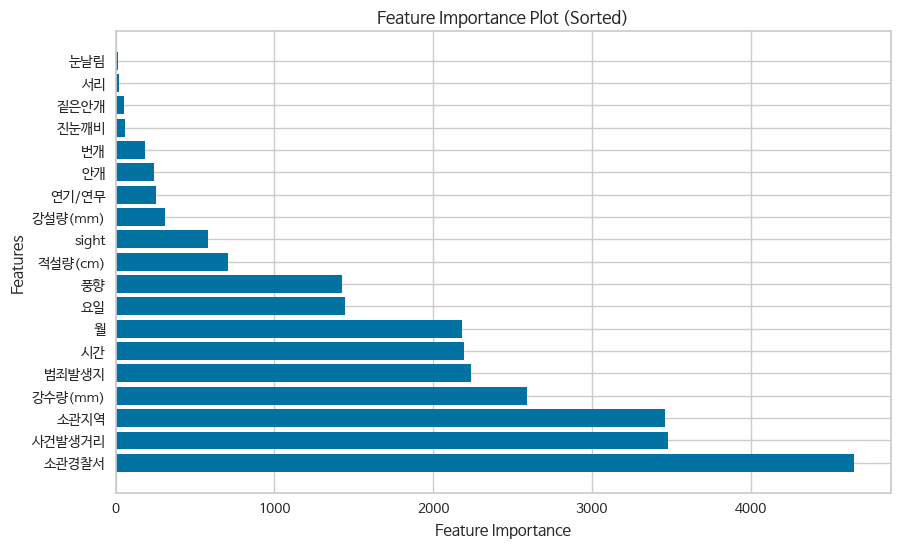

In [ ]:
feature_importance_pairs_lgb = list(zip(best_model_lgb.feature_importances_, X_id.columns))

feature_importance_pairs_lgb.sort(reverse=True)

sorted_feature_importances_lgb, sorted_feature_names_lgb = zip(*feature_importance_pairs_lgb)

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names_lgb, sorted_feature_importances_lgb)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (Sorted)')
plt.show()

## CATBOOST

In [ ]:
'''
def objective_cat(trial):
    param = {
        'iterations' : trial.suggest_int('iterations', 10, 1000),
        'depth' : trial.suggest_int('depth', 2, 8),
        'learning_rate' : trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'class_weights': weight,
    }

    cat_model = CatBoostClassifier(**param)
    model = cat_model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'macro')

    return score

study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective_cat, n_trials=100)

# 최적의 하이퍼 파라미터 출력
print('Best trial:')
trial_cat = study_cat.best_trial
print('  f1_score: {}'.format(trial_cat.value))
print('  Params: ')
for key, value in trial_cat.params.items():
    print('    {}: {}'.format(key, value))
'''

"\ndef objective_cat(trial):\n    param = {\n        'iterations' : trial.suggest_int('iterations', 10, 1000),\n        'depth' : trial.suggest_int('depth', 2, 8),\n        'learning_rate' : trial.suggest_float('learning_rate', 1e-4, 1e-1),\n        'class_weights': weight,\n    }\n\n    cat_model = CatBoostClassifier(**param)\n    model = cat_model.fit(X_train,y_train)\n    y_pred = model.predict(X_test)\n    score = f1_score(y_test, y_pred, average = 'macro')\n\n    return score\n\nstudy_cat = optuna.create_study(direction='maximize')\nstudy_cat.optimize(objective_cat, n_trials=100)\n\n# 최적의 하이퍼 파라미터 출력\nprint('Best trial:')\ntrial_cat = study_cat.best_trial\nprint('  f1_score: {}'.format(trial_cat.value))\nprint('  Params: ')\nfor key, value in trial_cat.params.items():\n    print('    {}: {}'.format(key, value))\n"

In [ ]:
'''
best_params_cat = study_cat.best_params
best_model_cat = CatBoostClassifier(**best_params_cat)
best_model_cat.fit(X,y)
'''

'\nbest_params_cat = study_cat.best_params\nbest_model_cat = CatBoostClassifier(**best_params_cat)\nbest_model_cat.fit(X,y)\n'

Best trial:
  f1_score: 0.5304737161659353
  Params:
    iterations: 780
    depth: 4
    learning_rate: 0.09915967500507414

In [ ]:
'''
feature_importance_pairs_cat = list(zip(best_model_cat.feature_importances_, X_id.columns))

feature_importance_pairs_cat.sort(reverse=True)

sorted_feature_importances_cat, sorted_feature_names_cat = zip(*feature_importance_pairs_cat)

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names_cat, sorted_feature_importances_cat)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (Sorted)')
plt.show()
'''

"\nfeature_importance_pairs_cat = list(zip(best_model_cat.feature_importances_, X_id.columns))\n\nfeature_importance_pairs_cat.sort(reverse=True)\n\nsorted_feature_importances_cat, sorted_feature_names_cat = zip(*feature_importance_pairs_cat)\n\nplt.figure(figsize=(10, 6))\nplt.barh(sorted_feature_names_cat, sorted_feature_importances_cat)\nplt.xlabel('Feature Importance')\nplt.ylabel('Features')\nplt.title('Feature Importance Plot (Sorted)')\nplt.show()\n"

## 제출물 생성

In [ ]:
final_predictions_lgb = best_model_lgb.predict(test_dataset)
#final_predictions_cat = best_model_cat.predict(test_dataset)

In [ ]:
#result_cat = pd.read_csv('sample_submission.csv')
result_lgb = pd.read_csv('sample_submission.csv')
#result_cat['TARGET'] = final_predictions_cat
result_lgb['TARGET'] = final_predictions_lgb
#print(result_cat['TARGET'].value_counts())
print(result_lgb['TARGET'].value_counts())


0    9443
1    4151
2    3695
Name: TARGET, dtype: int64


In [ ]:
#result_cat.to_csv('result_cat.csv',index = False)

In [ ]:
result_lgb.to_csv('result_lgb.csv',index = False)

**피드백 및 난이도**
- 대회에서 데이터분석 기법에 대해 간략히 설명해준 점이 대회 진행의 베이스라인으로 작용하여 모델을 한층 만들기 수월했다. 그러나 데이터 분석 및 인공지능에 대해 모르는 사람이 이해하기에는 어려움이 있었고 그런 사람들을 고려했을 때에는 대회기간이 짧았던 것 같다. 그렇지만 평균치를 고려하였을 때에는 난이도가 적절했던 것 같다.